<a href="https://colab.research.google.com/github/AnuragBangre/Unit_Salues_Prediction/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

**Data Collection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

print(train.describe())
print(test.describe())

print(train.head())
print(test.head())

print(train.info())
print(test.info())

print(train['Item Id'].unique())
print(train['Item Id'].value_counts())


           ad_spend         units     unit_price
count  77303.000000  83592.000000  101490.000000
mean     110.771470     10.284381     106.750922
std      529.303777     68.945915     425.704733
min        0.000000   -173.000000   -8232.000000
25%        0.000000      0.000000       0.000000
50%        4.230000      1.000000       0.000000
75%       44.310000      5.000000       0.000000
max    47934.990000   9004.000000   21557.390000
           ad_spend   unit_price
count   1382.000000  2833.000000
mean     198.838032    98.725873
std      797.354508   383.585307
min        0.000000 -1988.180000
25%        0.730000     0.000000
50%       39.200000     0.000000
75%      156.012500     0.000000
max    18724.850000  6870.000000
                      ID        date     Item Id  \
0  2022-04-12_B09KDTS4DC  12-04-2022  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH  12-04-2022  B09MR2MLZH   
2  2022-04-12_B09KSYL73R  12-04-2022  B09KSYL73R   
3  2022-04-12_B09KT5HMNY  12-04-2022  B09KT5HMNY   
4 

In [ ]:
train.isnull().sum()

,0
ID,0
date,0
Item Id,2
Item Name,1832
ad_spend,24187
anarix_id,0
units,17898
unit_price,0


0.770315187934518


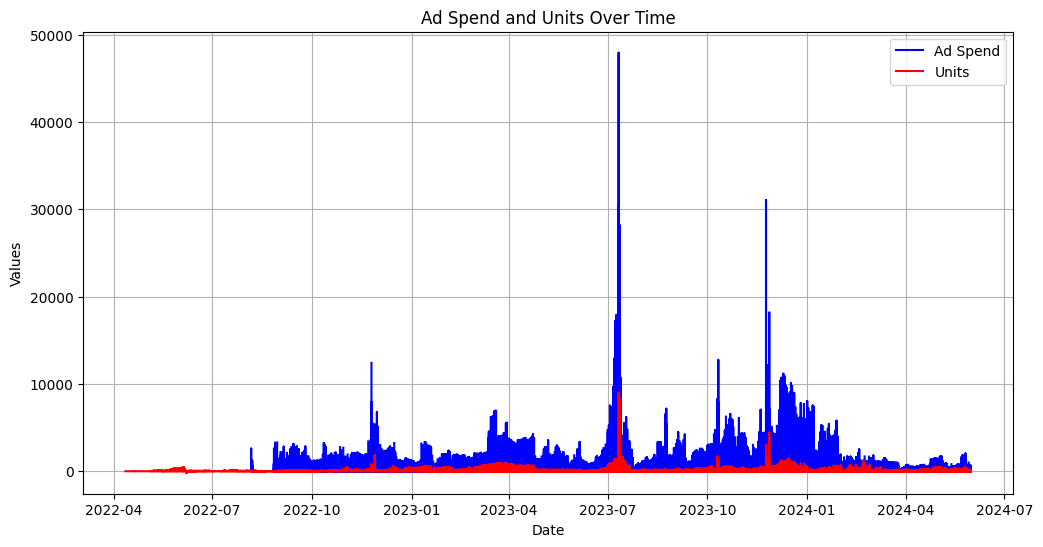

In [ ]:
correlation = train['ad_spend'].corr(train['units'])
print(correlation)


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('/content/train.csv')

# Convert 'date' column to datetime
train['date'] = pd.to_datetime(train['date'], format='%d-%m-%Y')

# Set the 'date' column as the index
train.set_index('date', inplace=True)
plt.figure(figsize=(12, 6))

# Plot ad_spend
plt.plot(train.index, train['ad_spend'], label='Ad Spend', color='blue')

# Plot units
plt.plot(train.index, train['units'], label='Units', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Ad Spend and Units Over Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
train = train.dropna(subset=['ad_spend'])


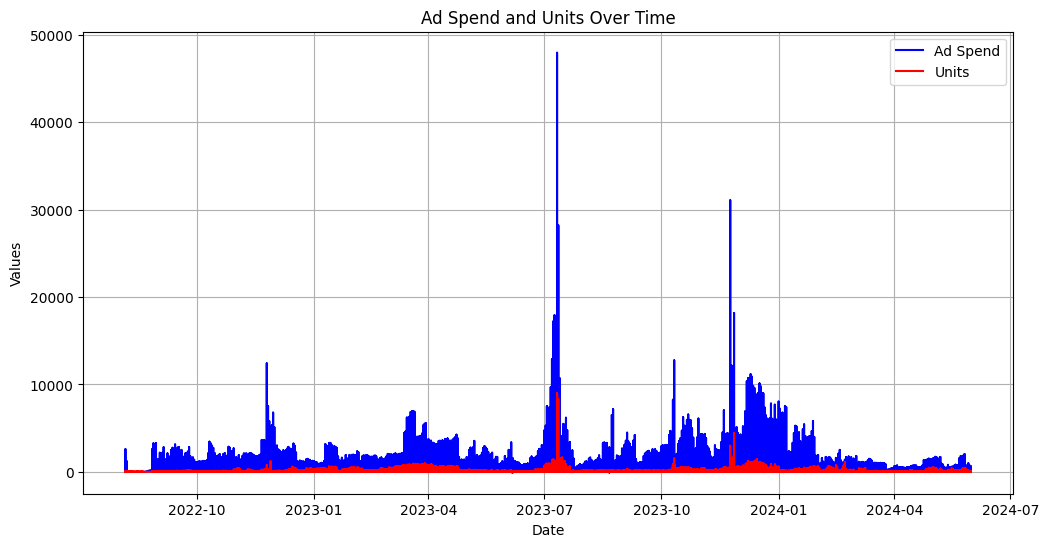

In [ ]:

plt.figure(figsize=(12, 6))

# Plot ad_spend
plt.plot(train.index, train['ad_spend'], label='Ad Spend', color='blue')

# Plot units
plt.plot(train.index, train['units'], label='Units', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Ad Spend and Units Over Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
train.isnull().sum()

,0
ID,0
Item Id,2
Item Name,1665
ad_spend,0
anarix_id,0
units,17898
unit_price,0


In [ ]:
correlation = train['ad_spend'].corr(train['units'])
print(correlation)


0.770315187934518


In [ ]:

train['units'] = train['units'].interpolate(method='time')


In [ ]:
train.isnull().sum()

,0
ID,0
Item Id,2
Item Name,1665
ad_spend,0
anarix_id,0
units,0
unit_price,0


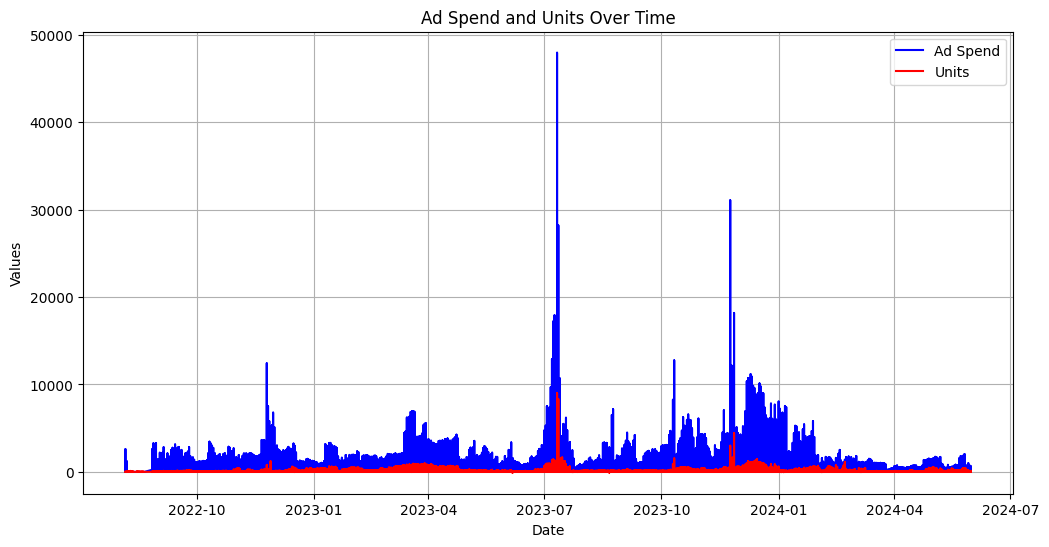

In [ ]:
plt.figure(figsize=(12, 6))

# Plot ad_spend
plt.plot(train.index, train['ad_spend'], label='Ad Spend', color='blue')

# Plot units
plt.plot(train.index, train['units'], label='Units', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Ad Spend and Units Over Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
correlation = train['ad_spend'].corr(train['units'])
print(correlation)
correlation = train['unit_price'].corr(train['units'])
print(correlation)


0.7399249231873672
0.08242702700037732


Overall KPI: 3.328386137583326


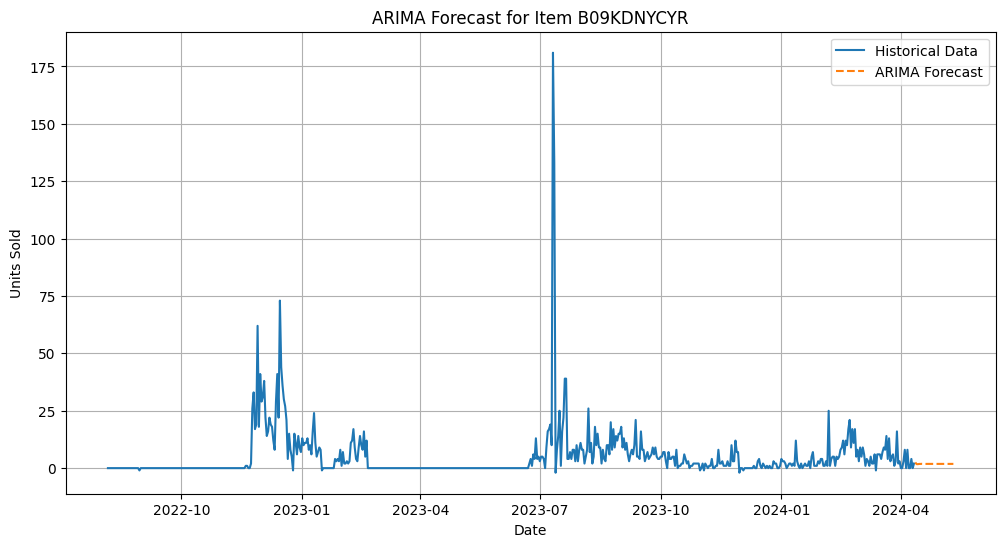

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/doez1xp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/591iueh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10275', 'data', 'file=/tmp/tmpwd_cix0d/doez1xp_.json', 'init=/tmp/tmpwd_cix0d/591iueh5.json', 'output', 'file=/tmp/tmpwd_cix0d/prophet_model20xsyke4/prophet_model-20240802223257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:32:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


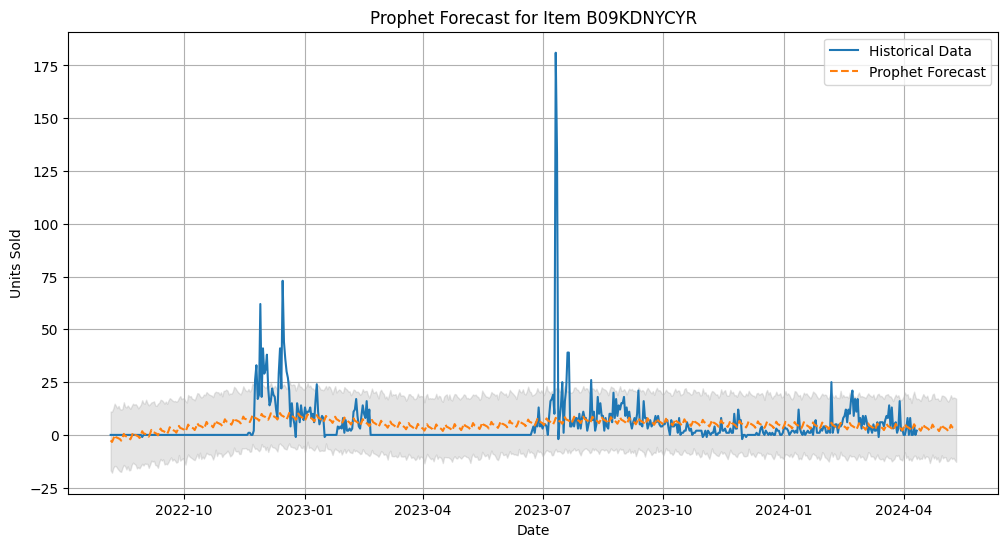

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0056
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━

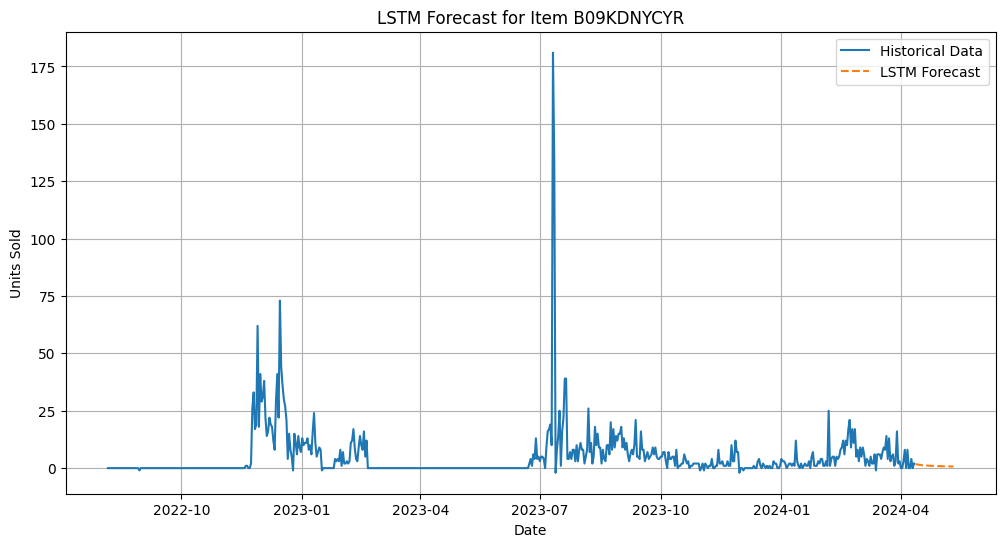

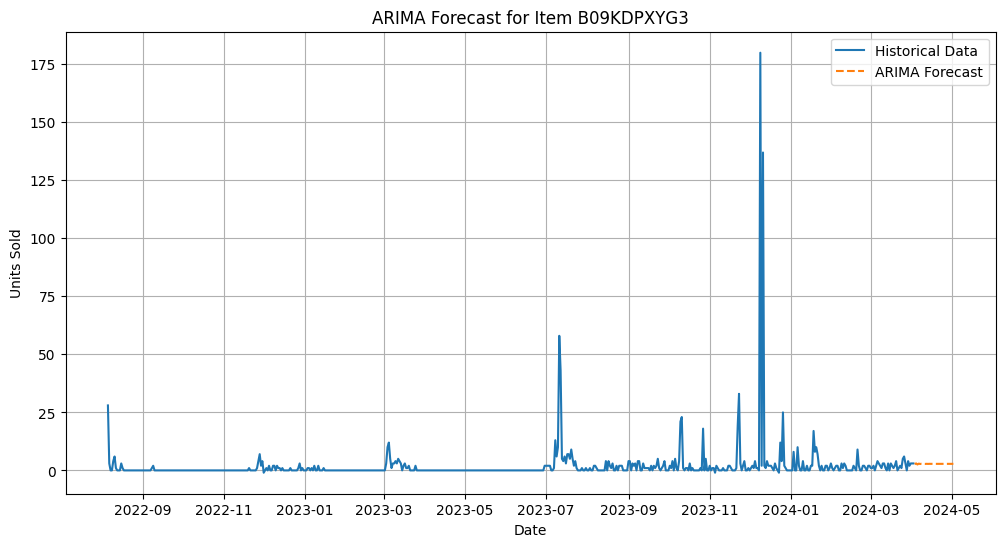

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/rujkydst.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/ygp3ae6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30591', 'data', 'file=/tmp/tmpwd_cix0d/rujkydst.json', 'init=/tmp/tmpwd_cix0d/ygp3ae6t.json', 'output', 'file=/tmp/tmpwd_cix0d/prophet_model14hq1q08/prophet_model-20240802223309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:33:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:33:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


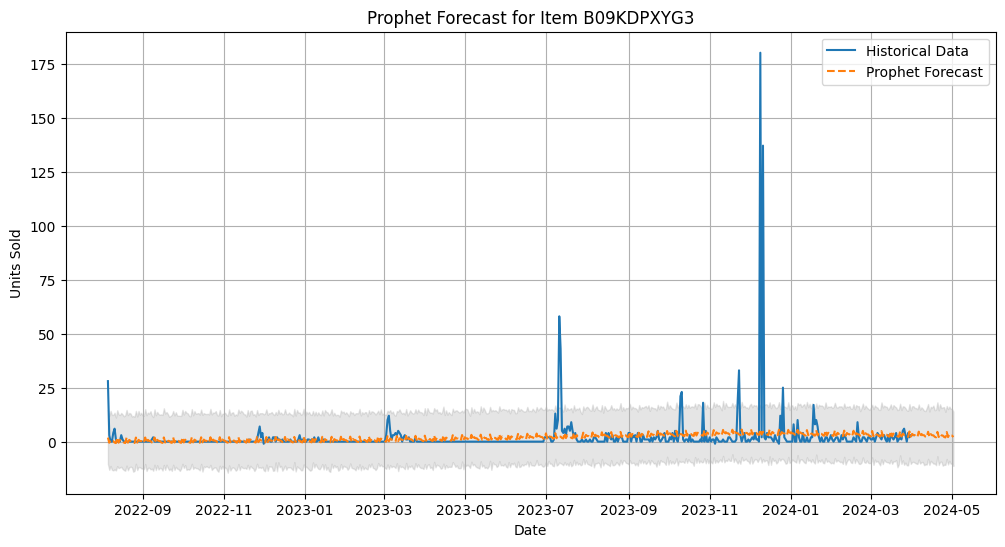

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0017
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.0871e-04
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0027
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0045
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0024
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1

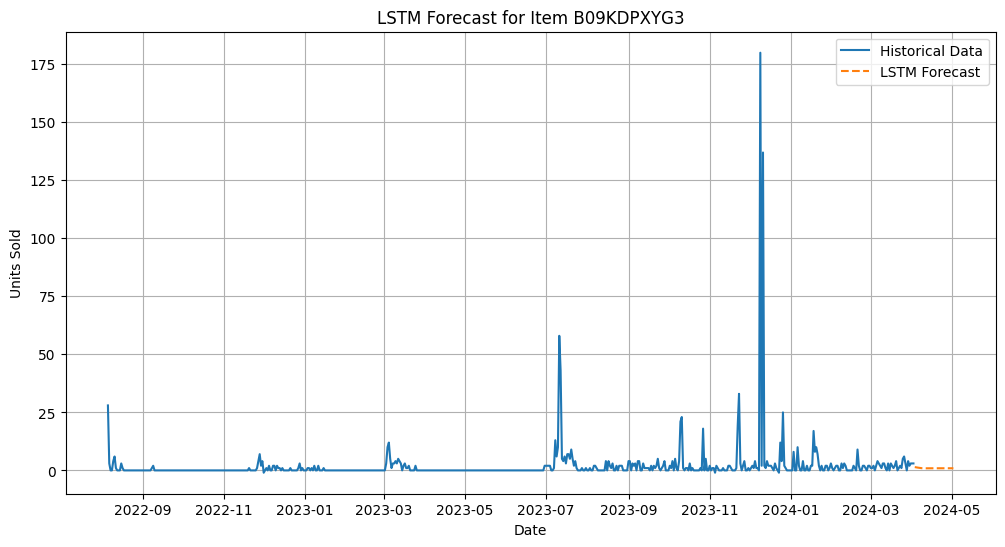

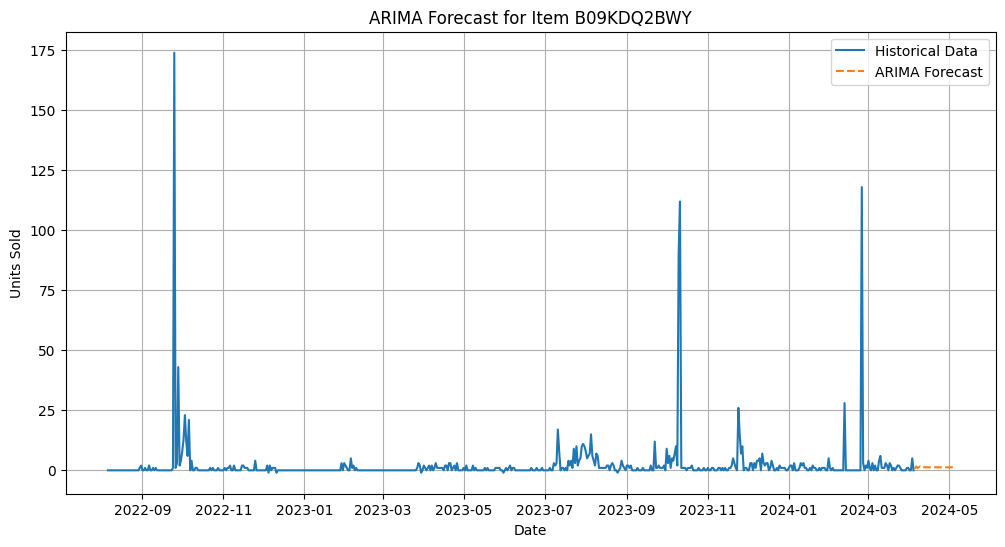

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/p87k2jjx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/jhhiw1_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76255', 'data', 'file=/tmp/tmpwd_cix0d/p87k2jjx.json', 'init=/tmp/tmpwd_cix0d/jhhiw1_7.json', 'output', 'file=/tmp/tmpwd_cix0d/prophet_model_8r9lwuq/prophet_model-20240802223326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:33:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


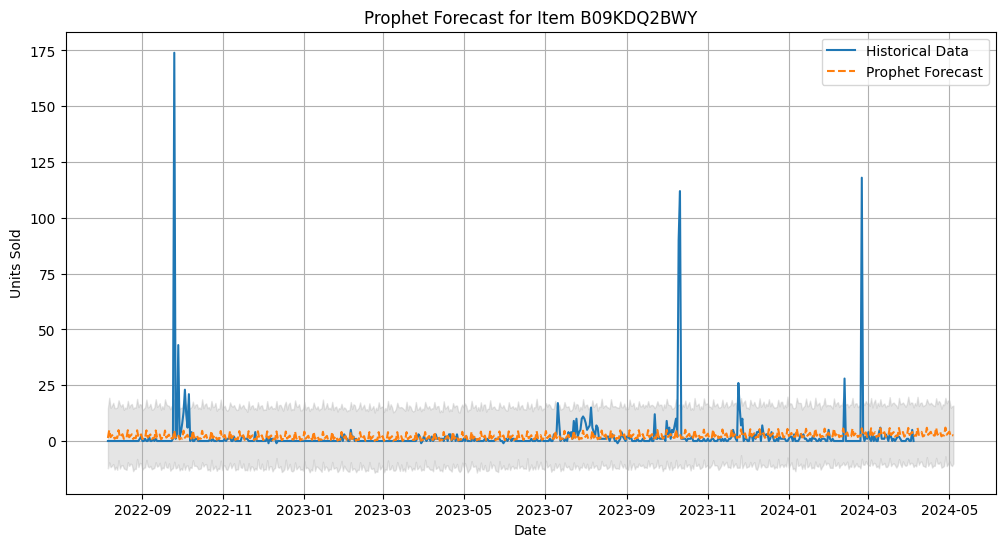

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0020
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0044
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0023
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0064
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0069
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━

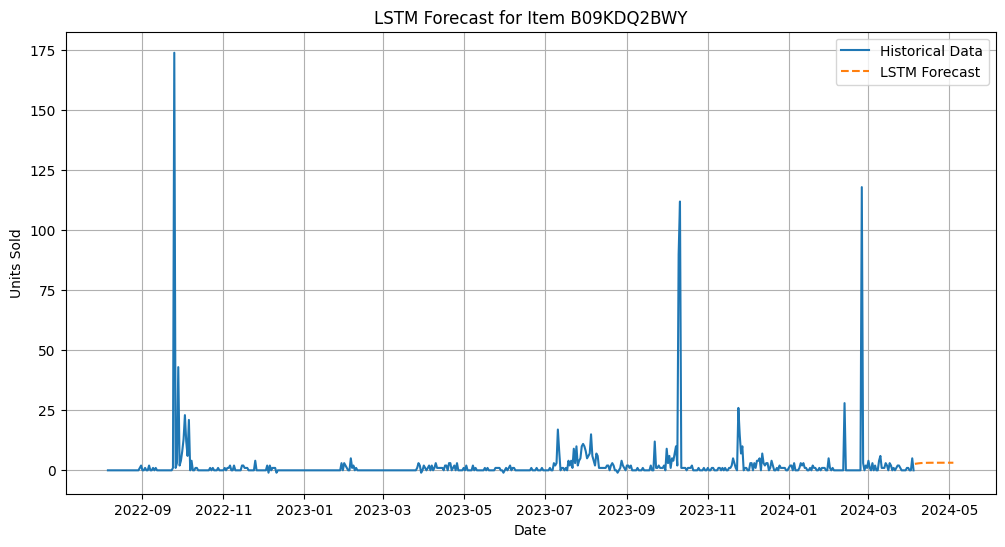

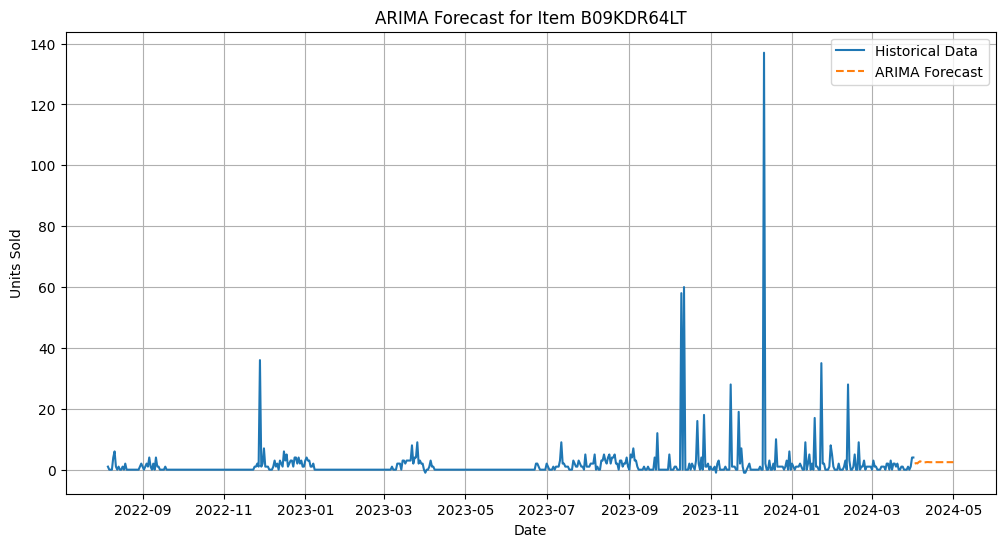

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/w19hxiir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/__hio3go.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40587', 'data', 'file=/tmp/tmpwd_cix0d/w19hxiir.json', 'init=/tmp/tmpwd_cix0d/__hio3go.json', 'output', 'file=/tmp/tmpwd_cix0d/prophet_modelpndsdvfl/prophet_model-20240802223339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:33:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:33:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


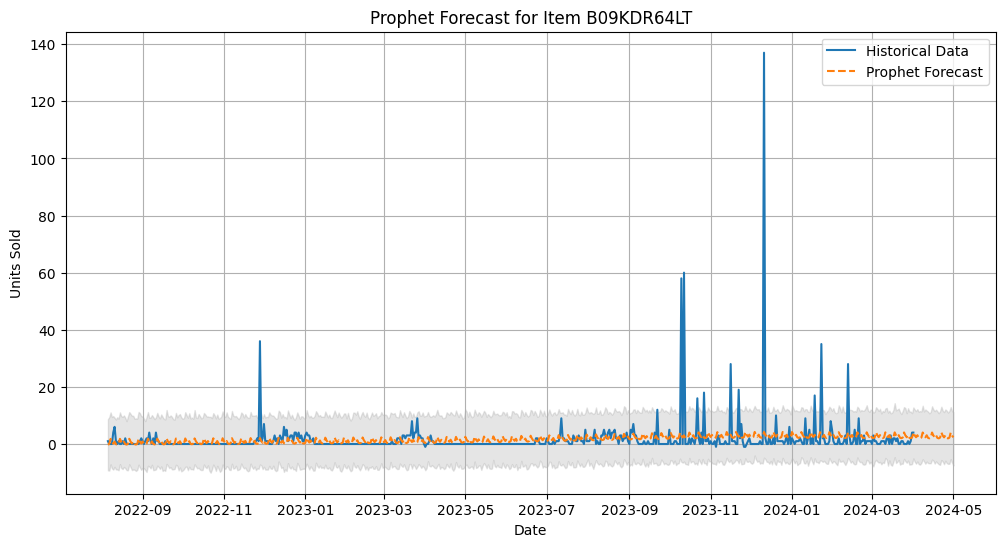

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0029
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0024
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━

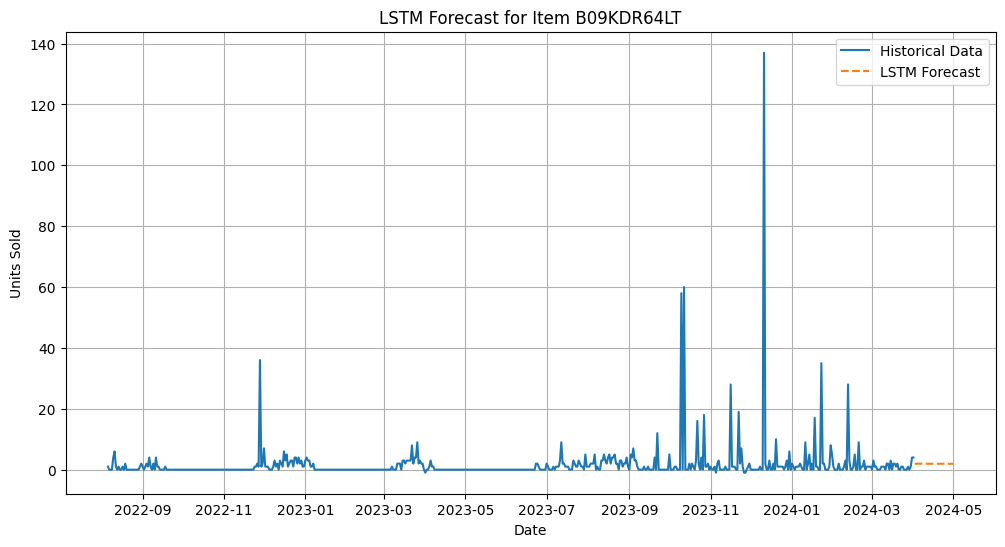

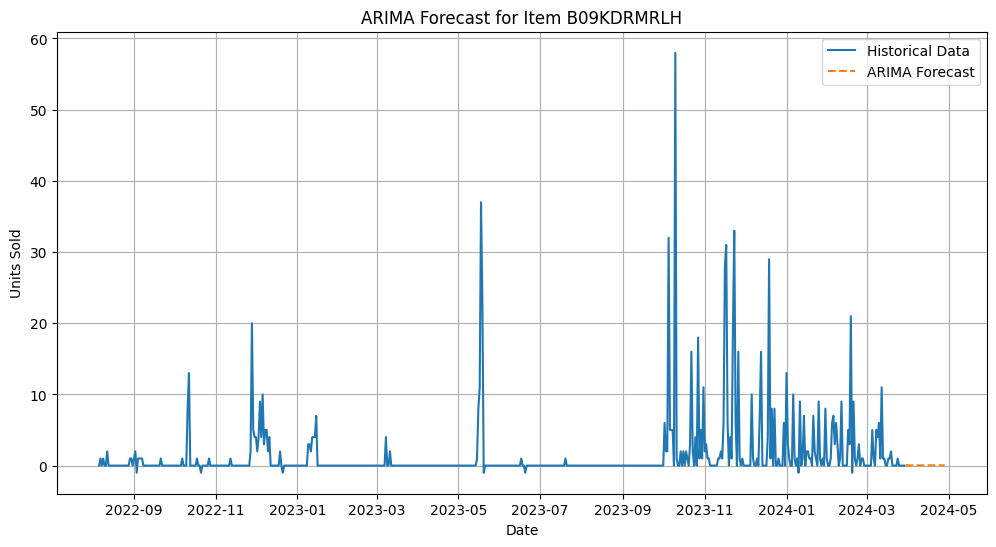

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/nob43ul5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd_cix0d/lb403ie2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70641', 'data', 'file=/tmp/tmpwd_cix0d/nob43ul5.json', 'init=/tmp/tmpwd_cix0d/lb403ie2.json', 'output', 'file=/tmp/tmpwd_cix0d/prophet_model_1kj38h5/prophet_model-20240802223351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:33:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


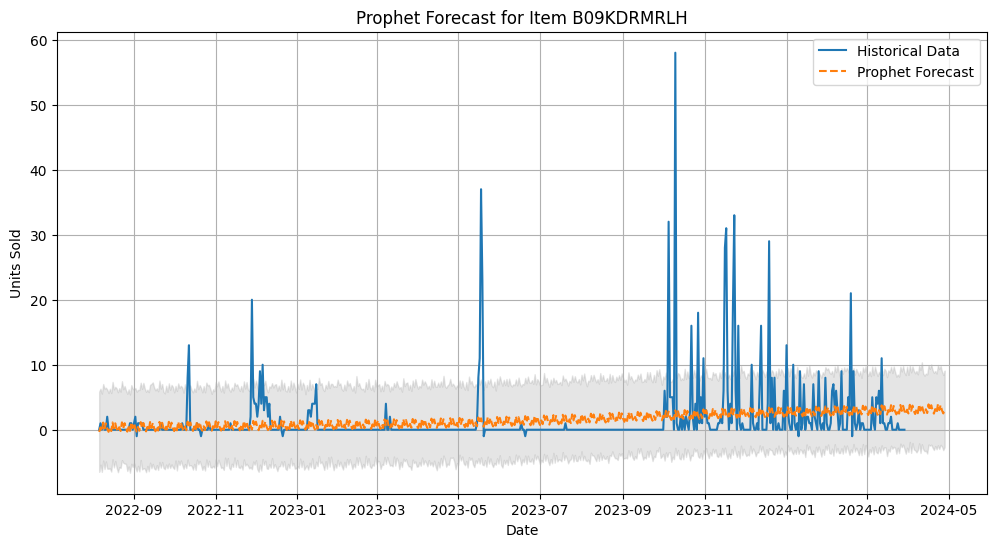

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0071
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0057
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0065
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0061
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0067
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0056
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━

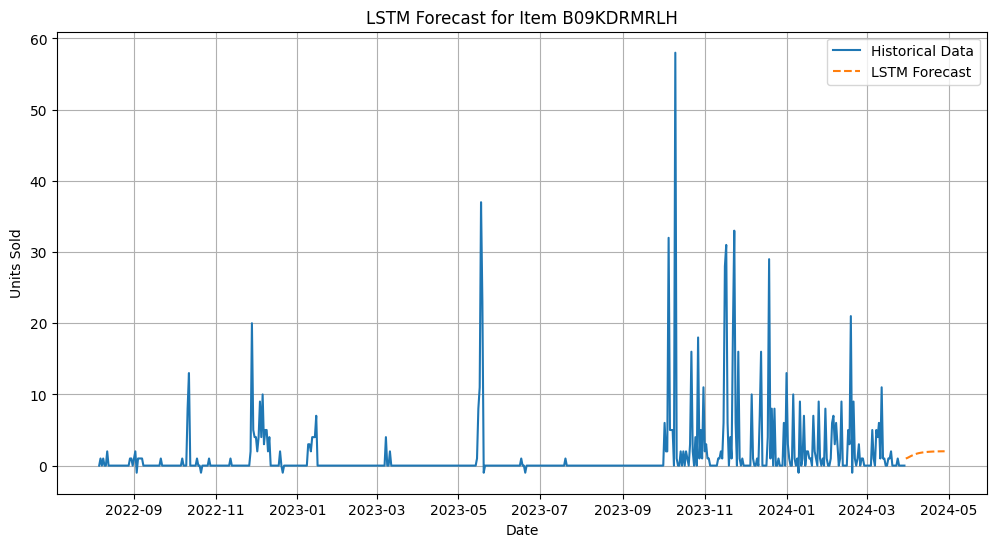

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler




# Group by Item Id and aggregate the total ad spend and units sold
grouped_data = train.groupby('Item Id').agg({
    'ad_spend': 'sum',
    'units': 'sum'
}).reset_index()

# Calculate KPI: Average Units Sold per Dollar Spent on Advertising
grouped_data['KPI'] = grouped_data['units'] / grouped_data['ad_spend']

# Handle division by zero (if any item has ad_spend = 0)
grouped_data['KPI'].replace([float('inf'), -float('inf')], 0, inplace=True)
grouped_data['KPI'].fillna(0, inplace=True)

# Compute overall KPI
overall_kpi = grouped_data['KPI'].mean()

print(f'Overall KPI: {overall_kpi}')

# Aggregate data by date and Item Id for time series forecasting
daily_data = train.groupby(['date', 'Item Id']).agg({
    'units': 'sum'
}).reset_index()

# Create a time series for each Item Id
item_ids = daily_data['Item Id'].unique()
product = 0
for item_id in item_ids:
    item_data = daily_data[daily_data['Item Id'] == item_id].copy()
    item_data.set_index('date', inplace=True)
    item_data = item_data.resample('D').sum().fillna(0)  # Resample to daily frequency

    # ARIMA
    arima_model = ARIMA(item_data['units'], order=(5,1,0))  # Example order
    arima_result = arima_model.fit()
    arima_forecast = arima_result.forecast(steps=30)
    arima_index = pd.date_range(start=item_data.index[-1] + pd.Timedelta(days=1), periods=30)
    arima_forecast_df = pd.DataFrame({'date': arima_index, 'units': arima_forecast})

    plt.figure(figsize=(12, 6))
    plt.plot(item_data.index, item_data['units'], label='Historical Data')
    plt.plot(arima_forecast_df['date'], arima_forecast_df['units'], label='ARIMA Forecast', linestyle='--')
    plt.title(f'ARIMA Forecast for Item {item_id}')
    plt.xlabel('Date')
    plt.ylabel('Units Sold')
    plt.legend()
    plt.grid()
    plt.show()

    # Prophet
    prophet_data = item_data.reset_index().rename(columns={'date': 'ds', 'units': 'y'})
    prophet_model = Prophet()
    prophet_model.fit(prophet_data)
    future = prophet_model.make_future_dataframe(periods=30)  # Forecast for 30 days
    forecast = prophet_model.predict(future)

    plt.figure(figsize=(12, 6))
    plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data')
    plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', linestyle='--')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.title(f'Prophet Forecast for Item {item_id}')
    plt.xlabel('Date')
    plt.ylabel('Units Sold')
    plt.legend()
    plt.grid()
    plt.show()

    # LSTM
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(item_data[['units']])
    X, y = [], []
    for i in range(len(scaled_data) - 10):
        X.append(scaled_data[i:i+10])
        y.append(scaled_data[i+10])
    X, y = np.array(X), np.array(y)

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=10, batch_size=32)

    # Forecast using LSTM
    lstm_forecast = []
    last_10_days = scaled_data[-10:]
    for _ in range(30):
        last_10_days_reshaped = np.expand_dims(last_10_days, axis=0)
        next_day_prediction = model.predict(last_10_days_reshaped)
        lstm_forecast.append(next_day_prediction[0, 0])
        last_10_days = np.append(last_10_days[1:], next_day_prediction, axis=0)

    lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))
    lstm_index = pd.date_range(start=item_data.index[-1] + pd.Timedelta(days=1), periods=30)
    lstm_forecast_df = pd.DataFrame({'date': lstm_index, 'units': lstm_forecast.flatten()})

    plt.figure(figsize=(12, 6))
    plt.plot(item_data.index, item_data['units'], label='Historical Data')
    plt.plot(lstm_forecast_df['date'], lstm_forecast_df['units'], label='LSTM Forecast', linestyle='--')
    plt.title(f'LSTM Forecast for Item {item_id}')
    plt.xlabel('Date')
    plt.ylabel('Units Sold')
    plt.legend()
    plt.grid()
    plt.show()

    product += 1
    if product == 5:
        break


